In [3]:
import pandas as pd
import numpy as np
#from pycorenlp import StanfordCoreNLP
import time
import sqlalchemy
import sqlite3
from itertools import count
from pysal.lib import weights
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
# from pysal.esda.mapclassify import K
# from seaborn.palettes import color_palette
from shapely.geometry import Point
import openpyxl
import pymssql
from esda.getisord import G_Local 

In [7]:
#Set for identical results
np.random.seed(2021)
#Import Relevant Country Shapefile
poly = gpd.read_file("C:/Users/sansa/Hotspot/Polygence Data/CA_Counties/CA_Counties_TIGER2016.shp")

#Repull conflict data (did this so I didn't have to continue to connect ICC vpn)
covid = pd.read_csv("C:/Users/sansa/Hotspot/Polygence Data/Hotspot Dataset - SubrecipientDetailReport (2).csv")


<AxesSubplot:>

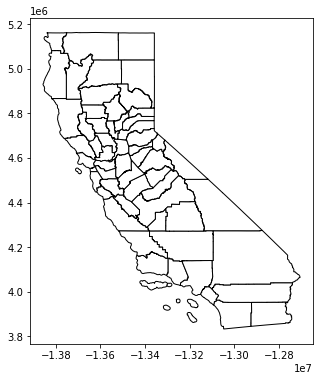

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
poly.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})

In [9]:
covid.head

<bound method NDFrame.head of     FIPS                      Subrecipient             NAME  \
0   6001                 County of Alameda          Alameda   
1   6003                  County of Alpine           Alpine   
2   6005                  County of Amador           Amador   
3   6007                   County of Butte            Butte   
4   6009               County of Calaveras        Calaveras   
5   6011                  County of Colusa           Colusa   
6   6013            County of Contra Costa     Contra Costa   
7   6015               County of Del Norte        Del Norte   
8   6017               County of El Dorado        El Dorado   
9   6019                  County of Fresno           Fresno   
10  6021                   County of Glenn            Glenn   
11  6023                County of Humboldt         Humboldt   
12  6025                County of Imperial         Imperial   
13  6027                    County of Inyo             Inyo   
14  6029                 

In [10]:
poly = poly[['NAME', 'geometry']]
poly.head

<bound method NDFrame.head of                NAME                                           geometry
0            Sierra  POLYGON ((-13431319.751 4821511.426, -13431312...
1        Sacramento  POLYGON ((-13490651.476 4680831.603, -13490511...
2     Santa Barbara  MULTIPOLYGON (((-13423116.772 4042044.149, -13...
3         Calaveras  POLYGON ((-13428575.483 4627725.228, -13428534...
4           Ventura  MULTIPOLYGON (((-13317853.594 3931602.414, -13...
5       Los Angeles  MULTIPOLYGON (((-13210018.388 3958856.141, -13...
6            Sonoma  POLYGON ((-13685069.767 4623872.832, -13685073...
7             Kings  POLYGON ((-13353767.857 4335831.239, -13353767...
8         San Diego  POLYGON ((-13073075.796 3919158.524, -13074423...
9            Placer  POLYGON ((-13476944.153 4722608.150, -13476936...
10    San Francisco  MULTIPOLYGON (((-13647797.317 4551561.433, -13...
11            Marin  POLYGON ((-13668520.001 4563468.198, -13668591...
12         Mariposa  POLYGON ((-13394132.438 45

In [11]:
df  = covid.merge(poly, on='NAME', how='left')

In [12]:
df = gpd.GeoDataFrame(df, geometry='geometry')
df.head

<bound method NDFrame.head of     FIPS                      Subrecipient             NAME  \
0   6001                 County of Alameda          Alameda   
1   6003                  County of Alpine           Alpine   
2   6005                  County of Amador           Amador   
3   6007                   County of Butte            Butte   
4   6009               County of Calaveras        Calaveras   
5   6011                  County of Colusa           Colusa   
6   6013            County of Contra Costa     Contra Costa   
7   6015               County of Del Norte        Del Norte   
8   6017               County of El Dorado        El Dorado   
9   6019                  County of Fresno           Fresno   
10  6021                   County of Glenn            Glenn   
11  6023                County of Humboldt         Humboldt   
12  6025                County of Imperial         Imperial   
13  6027                    County of Inyo             Inyo   
14  6029                 

In [13]:
w = weights.distance.KNN.from_dataframe(poly, k=8)

c:\Users\sansa\miniconda3\envs\polygence\lib\site-packages\pysal\lib\weights\util.py:1028: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in iterable])


In [14]:
lisa = esda.moran.Moran_Local(df['Total Covid Cases'], w)

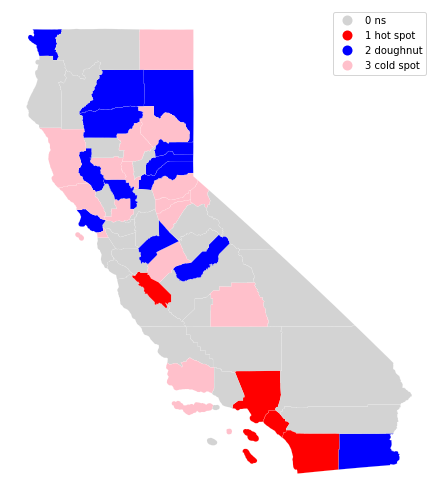

In [15]:
sig = 1 * (lisa.p_sim < 0.25)
hotspot = 1 * (sig * lisa.q==1)
coldspot = 3 * (sig * lisa.q==3)
doughnut = 2 * (sig * lisa.q==2)
diamond = 4 * (sig * lisa.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [18]:
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash
import plotly.express as px
import geopandas as gpd
import plotly.figure_factory as ff

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Output, Input
import dash_bootstrap_components as dbc

C:\Users\sansa\AppData\Local\Temp\ipykernel_4868\283825345.py:8: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\sansa\AppData\Local\Temp\ipykernel_4868\283825345.py:9: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [21]:
app = Dash(__name__)

app.layout = html.Div(children=[
    html.H1('Covid 19 Hotspot Analysis'),
    

])

app.run_server(debug=True)


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

In [19]:
app = Dash(__name__)


app.layout = html.Div([
    html.H4('Covid 19 Hotspot Analysis'),
    html.P("Select a candidate:"),
    dcc.RadioItems(
        id='candidate', 
        options=["Total", "/Jun 2020", "Jul/Aug 2020", "Sep/Oct 2020"],
        value="Ttal",
        inline=True
    ),
    dcc.Graph(id="graph"),

    html.P("Here Below you should find a hotspot analysis")
])


@app.callback(
    Output("graph", "figure"), 
    Input("candidate", "value"))
def display_choropleth(candidate):
    df = covid # replace with your own data source
    geojson = poly
    fig = px.choropleth(
        df, geojson=geojson, color=candidate,
        locations="district", featureidkey="properties.district",
        projection="mercator", range_color=[0, 6500])
    fig.update_geos(fitbounds="locations", visible=False)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    return fig


app.run_server(debug=True)


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

C:\Users\sansa\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
